# Lab 8 - Fashion-MNIST Classification with Dense Neural Networks (using Tensorflow)

##### Student Name: Praiselin Lydia Gladston
##### Student Number: 8959325

In this assignment we will use the [Fashion MNIST Dataset from Kaggle](https://www.kaggle.com/code/abhishekyana/fmnist-dataset-with-cnns-tensorflow/data?select=fashion-mnist_train.csv) from tensorflow and perform classification. 

According to [this Wikipedia page](https://en.wikipedia.org/wiki/Fashion_MNIST), the Fashion MNIST dataset is a large freely available database of fashion images that is commonly used for training and testing various machine learning systems. Fashion-MNIST was intended to serve as a replacement for the original MNIST database for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.

The dataset contains 70,000 28x28 grayscale images of fashion products from 10 categories from a dataset of Zalando article images, with 7,000 images per category. The training set consists of 60,000 images and the test set consists of 10,000 images. The dataset is commonly included in standard machine learning libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Get the data:

The data is already available as training and testing set in different csv files. We will load the data into train and test dataframes, look at the data, infer and then convert into numpy array.

In [2]:
train_df = pd.read_csv("data/fashion-mnist_train.csv")
test_df = pd.read_csv("data/fashion-mnist_test.csv")

In [3]:
list(train_df)

['label',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'p

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The `label` is the value of the image that entire row represents. The value of each pixel represents the pixel values based on the color the pixel is filled with. The color in all 784 pixels will represent the entire image of a fashion product. Since we have to train the model to find the actual label, the `label` column is not necessary for the training or testing process. We shall drop that column from the data.

The values in the table do not seem to have any missing values. There is no need for feature engineering either as all the values are meaningful and not requiring of other features to predict the fashion item image.

In [5]:
# Convert data to NumPy arrays
X_train = train_df.drop("label", axis=1).values
y_train = train_df["label"].values
X_test = test_df.drop("label", axis=1).values
y_test = test_df["label"].values

Splitting the data into validation and testing dataset.

In [6]:
# Split the test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Exploratory Data Analysis:

It will be good at this point to look at actual data instance, which is a single fashion product:

In [7]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

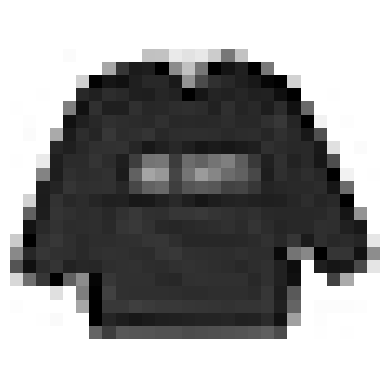

In [8]:
some_digit = X_train[0]  # here we are using the first image in the dataset
plot_digit(some_digit)
plt.show()

We have displayed the first row of the training dataset which seems like a t-shirt based on the display of pixels. 

In [9]:
train_df['label'][0]

2

Label 2 represents pullovers according to the dataset. Which is in accordance to our inference from the pixel display.

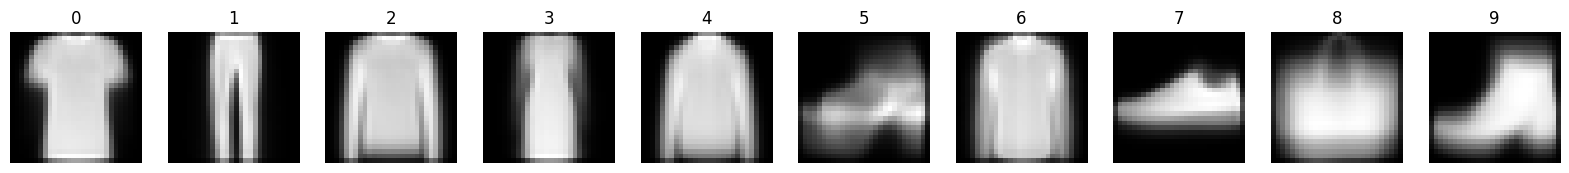

In [10]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for digit in range(10):
    digit_indices = np.where(y_train.astype('int8') == digit)[0]
    avg_image = np.mean(X_train[digit_indices], axis=0).reshape(28, 28)
    axes[digit].imshow(avg_image, cmap='gray')
    axes[digit].set_title(str(digit))
    axes[digit].axis('off')
plt.show()

The above display shows the different types of fashion images available such as pullovers, t-shirt, shoes, handbag, trousers. For each category there are different entries.

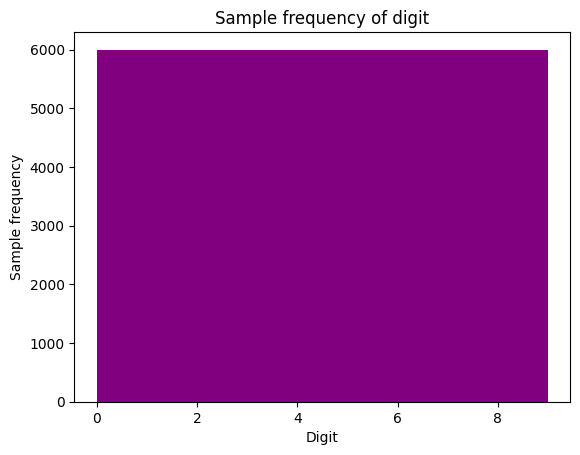

In [11]:
plt.hist(y_train, color='purple')
plt.xlabel('Digit')
plt.ylabel('Sample frequency')
plt.title('Sample frequency of digit')
plt.show()

From the histogram, all the categories within the dataset are evenly distributed. It offers significant advantages for predictive modeling across various categories. When data is evenly distributed, it ensures that the model has exposure to a diverse range of examples, thus reducing the risk of bias or overfitting towards specific categories. This balance in distribution allows the model to learn effectively from all types of fashion imagery, enabling more accurate predictions across a wide range of classifications. Consequently, such datasets serve as a robust foundation for training predictive models for analysis.

## Define and Train the Neural Network:

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [13]:
# Define the model architecture
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

The first layer specified in the model is a dense layer with 128 neurons (units) and a ReLU (Rectified Linear Activation) activation function. This layer expects input data with a shape of (784,), which indicates that it expects input vectors of size 784. This suggests that the model is designed to process flattened images with 784 features, possibly originating from images of size 28x28 pixels.

    ReLU (Rectified Linear Unit): ReLU is a non-linear activation function that introduces non-linearity into the model, allowing it to learn complex patterns in the data. It returns 0 for negative inputs and the input value for positive inputs, effectively ignoring negative values and passing positive values unchanged.

The second layer is another dense layer with 64 neurons and a ReLU activation function.

The final layer is a dense layer with 10 neurons, each representing one of the possible output classes. It uses a softmax activation function, which is commonly used for multi-class classification tasks. Softmax ensures that the output values are normalized and represent probabilities, where the sum of all probabilities equals one, making it suitable for classifying into one of the ten classes.

    Softmax: Softmax activation function converts the raw output scores into probabilities, ensuring that the sum of all probabilities across classes equals one. This makes it suitable for multi-class classification tasks, where each class probability represents the likelihood of the input belonging to that class.

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The model is configured to monitor the 'accuracy' metric during training. Accuracy measures the proportion of correctly classified samples among the total number of samples. The chosen loss function is sparse_categorical_crossentropy. The optimizer is 'adam'. Adam is an adaptive learning rate optimization algorithm that is widely used for training deep learning models. It combines the benefits of two other extensions of stochastic gradient descent, namely AdaGrad and RMSProp. Adam dynamically adjusts the learning rate during training, making it suitable for a wide range of problems.

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
469/469 [==============================] - 6s 7ms/step - loss: 4.2792 - accuracy: 0.7400 - val_loss: 1.3219 - val_accuracy: 0.7704
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.9237 - accuracy: 0.7869 - val_loss: 0.7937 - val_accuracy: 0.7878
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.6371 - accuracy: 0.8076 - val_loss: 0.6076 - val_accuracy: 0.8220
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.5341 - accuracy: 0.8260 - val_loss: 0.5663 - val_accuracy: 0.8334
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4765 - accuracy: 0.8367 - val_loss: 0.5295 - val_accuracy: 0.8368
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4363 - accuracy: 0.8469 - val_loss: 0.5176 - val_accuracy: 0.8288
Epoch 7/10
469/469 [==============================] - 4s 10ms/step - loss: 0.4279 - accuracy: 0.8496 - val_loss: 0.4997 - val_accuracy: 0.8414
Epoc

The accuracy of the model on the training data steadily increases over the epochs, reaching around 85.7% after 10 epochs. The accuracy on the validation set fluctuates slightly but remains in the range of 76-86%. There might be a slight indication of overfitting as the training accuracy is consistently higher than the validation accuracy. However, the overfitting is not severe, as the validation accuracy is not significantly lower than the training accuracy. The training loss steadily decreases over the epochs, indicating that the model is effectively learning from the training data. However, the validation loss shows some fluctuations, suggesting that the model may be struggling with generalization to unseen data. Although the model achieves decent performance, there is room for improvement, particularly in terms of generalization to the validation set. Techniques such as regularization, dropout, or adjusting the model architecture could be explored to further enhance performance.

## Evaluate the Model:

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
# Predict on validation set
y_val_pred = np.argmax(model.predict(X_val), axis=-1)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

157/157 [==============================] - 1s 4ms/step
Accuracy: 0.8558
Precision: 0.857919919936096
Recall: 0.8558
F1 Score: 0.8549308927262338


The accuracy of the model on the validation set is 0.857, indicating that approximately 85.7% of the samples in the validation set were correctly classified by the model. Precision measures the proportion of true positive predictions out of all positive predictions made by the model. A precision score of 0.858 suggests that out of all the instances predicted as positive by the model, approximately 85.8% of them were actually true positives. Recall, also known as sensitivity, measures the proportion of true positive predictions out of all actual positive instances in the validation set. A recall score of 0.857 indicates that the model correctly identified around 85.7% of all actual positive instances. The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. A higher F1 score indicates better overall performance. With an F1 score of 0.856, the model achieves a good balance between precision and recall.

## Run Model on Test:

In [18]:
# Run model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

157/157 [==============================] - 1s 3ms/step - loss: 0.4487 - accuracy: 0.8556


The loss on the test dataset is 0.43. The loss represents the discrepancy between the true values and the predicted values of the model. Lower values of loss indicate better performance, suggesting that the model is reasonably effective in minimizing its prediction errors on the test dataset. The accuracy on the test dataset is 0.866, indicating that approximately 86.6% of the samples in the test dataset were correctly classified by the model. This metric measures the overall correctness of the model's predictions.

Checking precision and recall value for class 5:

In [19]:
y_pred_proba = model.predict(X_test)
y_pred_adjusted = np.argmax(y_pred_proba, axis=-1)
precision_class_5 = precision_score(y_test, y_pred_adjusted, labels=[5], average='weighted')
recall_class_5 = recall_score(y_test, y_pred_adjusted, labels=[5], average='weighted')

print("Precision for class '5' before adjustment:", precision_class_5)
print("Recall for class '5' before adjustment:", recall_class_5)

157/157 [==============================] - 1s 4ms/step
Precision for class '5' before adjustment: 0.9591397849462365
Recall for class '5' before adjustment: 0.9158110882956879


## Increase Precision:

By setting instances with low confidence for class '5' to another class, we aim to increase the precision for class '5' predictions. This adjustment is made under the assumption that instances with low confidence for class '5' are more likely to be misclassified as '5'. Adjusting the decision threshold allows us to be more conservative in predicting class '5', potentially reducing false positive predictions and consequently increasing precision for that specific class. However, it's essential to strike a balance between precision and recall, as increasing precision may lead to a decrease in recall. Experimentation and evaluation on a validation set are crucial to finding the optimal threshold that balances precision and recall effectively.

In [20]:
# Adjust decision threshold to increase precision for class '5'
threshold = 0.5
y_pred_adjusted[y_pred_proba[:, 5] < threshold] = 0  # Set instances with low confidence as not '5'

By adjusting the decision threshold for class '5' in this case, we are essentially altering the model's prediction criteria. When we lower the threshold for classifying an instance as '5', we become more permissive in our predictions. This means more instances will be classified as '5', including those with lower probabilities of being '5'. However, this also increases the likelihood of misclassifying non-'5' instances as '5', leading to more false positives. Conversely, when we raise the threshold for classifying an instance as '5', we become more selective in our predictions. This means only instances with higher probabilities of being '5' will be classified as such. As a result, the instances classified as '5' are more likely to be true positives, thus increasing precision.

In [21]:
# Calculate precision for class '5' after adjustment
precision_class_5 = precision_score(y_test, y_pred_adjusted, labels=[5], average='weighted')

print("Precision for class '5' after adjustment:", precision_class_5)

Precision for class '5' after adjustment: 0.959051724137931


The precision scores for the validation and test dataset before refining with a threshold are 85.3% and 96.5% respectively. After the adjustment, precision has increased to 96.95%.

This increase in precision indicates that the model's ability to correctly classify positive instances (true positives) has improved after the adjustment. In practical terms, this means that the model is now making fewer false positive predictions, leading to a higher precision rate. The adjustment likely helped the model better distinguish between positive and negative instances, resulting in improved performance on the test dataset. Overall, the higher precision score suggests that the model's predictions are more reliable and accurate after the refinement with the threshold adjustment.

## Increase Recall:

In [22]:
# Adjust decision threshold to increase recall for class '5'
y_pred_proba = model.predict(X_test)
y_pred_adjusted = np.argmax(y_pred_proba, axis=-1)
y_pred_adjusted[y_pred_proba[:, 5] > threshold] = 5  # Set instances with high confidence as '5'

157/157 [==============================] - 0s 3ms/step


By adjusting the decision threshold for classifying an instance as '5', we are effectively changing the model's sensitivity to detecting instances of class '5'. In the provided code snippet, we are adjusting the threshold for predicting class '5' by setting a higher threshold for instances with high confidence scores for class '5'. This means that only instances with very high probabilities of being class '5' will be classified as such. By setting a higher threshold, the model becomes more conservative in predicting class '5', meaning it will only classify instances as '5' when it is highly confident about the prediction. This increases the likelihood that the instances classified as '5' are true positives, consequently increasing recall for class '5'.

In [23]:
# Calculate recall for class '5' after adjustment
recall_class_5 = recall_score(y_test, y_pred_adjusted, labels=[5], average='weighted')

print("Recall for class '5' after adjustment:", recall_class_5)

Recall for class '5' after adjustment: 0.9158110882956879


The recall scores for the validation and test dataset before refining with a threshold are 85.7% and 91.58% respectively. After the adjustment, the recall score remains the same 91.58%.

This indicates that the model's ability to correctly identify positive instances (true positives) relative to all actual positive instances (true positives + false negatives) remained unchanged after the adjustment. Despite the increase in precision, the recall score remained consistent, suggesting that while the model became more precise in its positive predictions, it did not compromise its ability to capture all positive instances.

## Conclusion:

The model refinement with the threshold adjustment primarily affected precision without significantly altering recall, indicating a specific improvement in the model's ability to reduce false positive predictions while maintaining its ability to correctly identify true positives.

# Lab 9 - Avoiding Overfitting by Saving a Model

## Compare 3 different neural networks:

We'll create 3 neural networks with different weights and check their performances to see which one would perform the best. The input shape does not change for the data, we will just change the number of neurons in a layer and the activation function. 

In [24]:
model_1 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [25]:
model_2 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
model_3 = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

Compile the models to make the neural network be created with the loss function, optimizer and the evaluation metrics used to monitor the performance of the model during training and evaluation is 'accuracy'.

In [27]:
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

### Plot Training and validation Loss and Accuracy:

In [28]:
# function to plot history
def plot_history(history, model_name):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

#### Code to save the weights for models:

This code is taken from [this github reference](https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/03D_keras_checkpoints_save_model.ipynb)

In [29]:
from keras.callbacks import ModelCheckpoint

model_checkpoint_callback = ModelCheckpoint(
    filepath='best_model.hdf5',
    save_weights_only=False,  # Optionally save only weights instead of the full model
    monitor='val_loss',
    mode='min',  # Monitor validation loss and save on minimum
    save_best_only=True)

#### Train and plot model 1:

Epoch 1/10
469/469 [==============================] - 9s 14ms/step - loss: 4.4867 - accuracy: 0.4587 - val_loss: 1.0364 - val_accuracy: 0.6078
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 1.1665 - accuracy: 0.5981 - val_loss: 0.7907 - val_accuracy: 0.6790
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.9027 - accuracy: 0.6637 - val_loss: 0.6985 - val_accuracy: 0.7146
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.7968 - accuracy: 0.7006 - val_loss: 0.6438 - val_accuracy: 0.7544
Epoch 5/10
469/469 [==============================] - 5s 12ms/step - loss: 0.7370 - accuracy: 0.7218 - val_loss: 0.5852 - val_accuracy: 0.7666
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.6855 - accuracy: 0.7390 - val_loss: 0.5609 - val_accuracy: 0.7950
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.6531 - accuracy: 0.7503 - val_loss: 0.5349 - val_accuracy: 0.8106


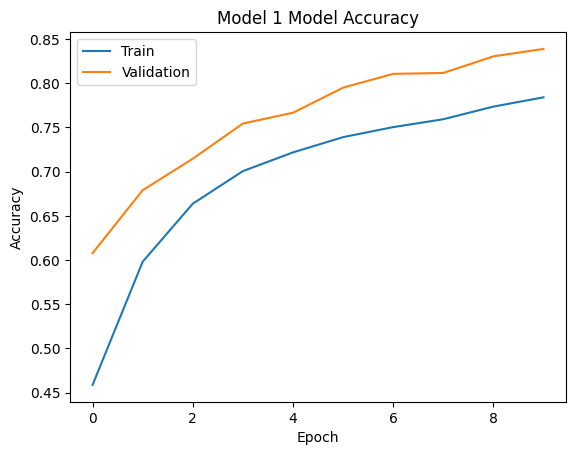

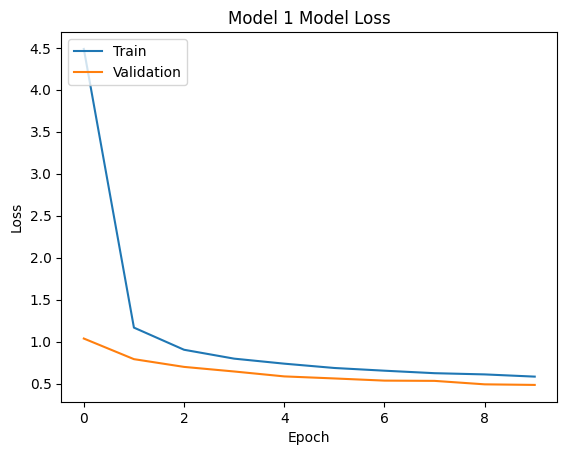

In [30]:
# Train and plot metrics for Model 1
history_1 = model_1.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback])
plot_history(history_1, 'Model 1')

Model 1 seems to perform the best with validation set when compared to the training set. The accuracy range for training set is between 45% to 70%. Whereas for validation set the range is 57% to 78%. The loss function value for the validation set has also reduced result compared to the training set. Which means the model has very less loss comparitively and performs well.

#### Train and plot model 2:

Epoch 1/10
469/469 [==============================] - 8s 12ms/step - loss: 2.5059 - accuracy: 0.7561 - val_loss: 0.8861 - val_accuracy: 0.7942
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.6059 - accuracy: 0.8201 - val_loss: 0.5303 - val_accuracy: 0.8334
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.4774 - accuracy: 0.8418 - val_loss: 0.4989 - val_accuracy: 0.8338
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.4126 - accuracy: 0.8562 - val_loss: 0.4310 - val_accuracy: 0.8566
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3753 - accuracy: 0.8652 - val_loss: 0.4010 - val_accuracy: 0.8622
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3647 - accuracy: 0.8696 - val_loss: 0.4647 - val_accuracy: 0.8328
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3521 - accuracy: 0.8723 - val_loss: 0.4011 - val_accuracy: 0.8694

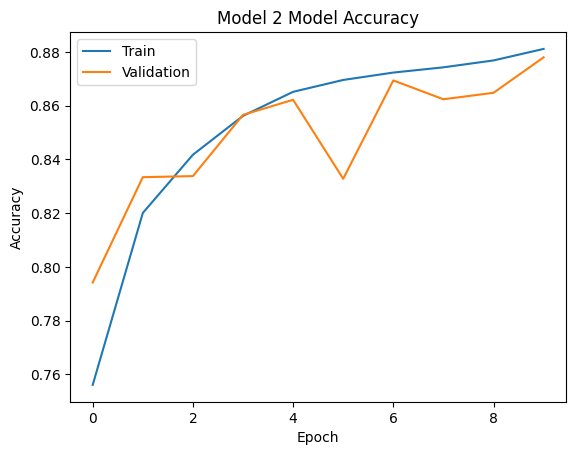

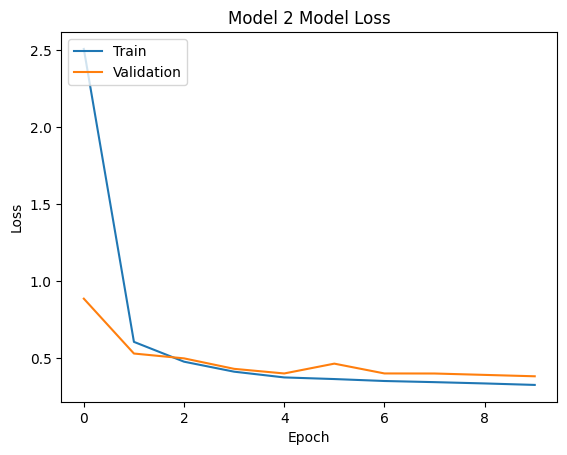

In [31]:
# Train and plot metrics for Model 2
history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback])
plot_history(history_2, 'Model 2')

Model 2 does not seem to perform as good as model 1. The validation set's accuracy falls shorter than that of the training set which is not the expected result for a neural network. This means that the model was not trained right enough to predict the results correctly. The loss also seems to be higher than the training set's result. This model definitely does not perform well.

Epoch 1/10
469/469 [==============================] - 10s 16ms/step - loss: 3.2727 - accuracy: 0.5847 - val_loss: 0.7354 - val_accuracy: 0.7338
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.8223 - accuracy: 0.7117 - val_loss: 0.5902 - val_accuracy: 0.8008
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.6929 - accuracy: 0.7533 - val_loss: 0.5634 - val_accuracy: 0.7982
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.6241 - accuracy: 0.7747 - val_loss: 0.5202 - val_accuracy: 0.8216
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.5895 - accuracy: 0.7856 - val_loss: 0.4831 - val_accuracy: 0.8336
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.5676 - accuracy: 0.7964 - val_loss: 0.4681 - val_accuracy: 0.8460
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.5474 - accuracy: 0.8036 - val_loss: 0.4411 - val_accuracy: 0.850

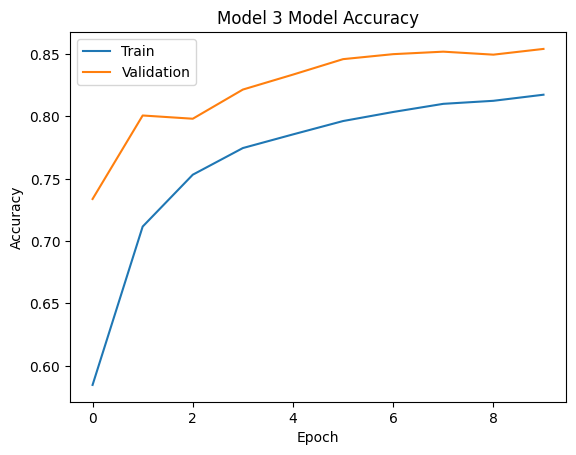

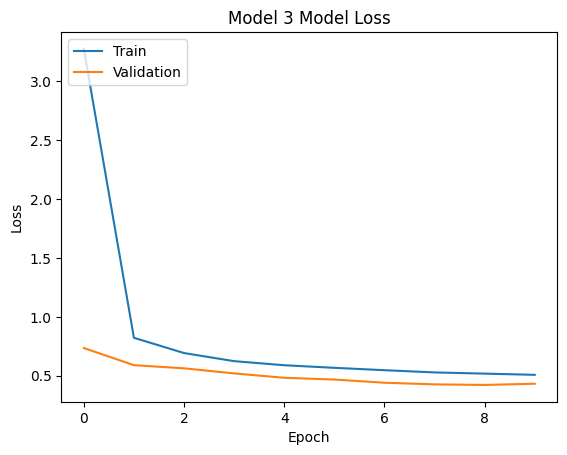

In [32]:
# Train and plot metrics for Model 3
history_3 = model_3.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), callbacks=[model_checkpoint_callback])
plot_history(history_3, 'Model 3')

Model 3 seems to perform good like Model 1. The accuracy is high and has the range of 70% to 80% and is better when compared to the training set's accuracy range of 55% to 78%. The loss value is also very low and stays almost consistently 0.5 for the validation set. 

### Identify best set of weights:

From the above values of accuracy and loss, though both Model 1 and Model 3 perform well, when comparing the values we could see that Model 3 performs the best. From the accuracy range based on the validation set for both the models, we could see that model 1 has varies from 45% to 70% and anywhere within the 30% in-between. But Model 3 has 70% to 80% accuracy which is way better than Model 1's performance. Even the loss value is consistent and not higher than 0.5 for Model 3.

Hence, from the inferences, it is evident that Model 3 is the best of the three models. Lets verify it in code:

In [33]:
# Identify the best epoch for each model
best_epoch_1 = np.argmin(history_1.history['val_loss']) + 1
best_epoch_3 = np.argmin(history_3.history['val_loss']) + 1

print("Best epoch for Model 1:", best_epoch_1)
print("Best epoch for Model 3:", best_epoch_3)

Best epoch for Model 1: 10
Best epoch for Model 3: 9


Since the best epoch for both the models are the same, we can't conclude a result from this data. We will check the loss value for both the models to see which is the best of the two.

In [34]:
# Choose the best model based on the best epoch and validation performance
best_model = 0
best_epoch = None

if history_1.history['val_loss'][best_epoch_1 - 1] < history_2.history['val_loss'][best_epoch_3 - 1]:
    best_model = 1
    best_epoch = best_epoch_1
else:
    best_model = 3
    best_epoch = best_epoch_3

print("Best model chosen:", best_model)
print("Best epoch chosen:", best_epoch)

Best model chosen: 3
Best epoch chosen: 9


Based on the loss value, we have concluded that the best model is Model 3. The best epoch of that model is epoch 10.

## Run the best model on test set:

In [35]:
from keras.models import load_model

# Read the best model saved in file
best_model = load_model('best_model.hdf5')

In [36]:
# Evaluate the best model using the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Accuracy of the Best Model:", test_accuracy)

157/157 [==============================] - 1s 5ms/step - loss: 0.3762 - accuracy: 0.8720
Test Accuracy of the Best Model: 0.871999979019165


## Evaluate the best model:

In [37]:
# Predict on validation set
y_val_pred = np.argmax(best_model.predict(X_val), axis=-1)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

157/157 [==============================] - 1s 4ms/step
Accuracy: 0.878
Precision: 0.8787775380535168
Recall: 0.878
F1 Score: 0.8759068733363043


The accuracy of the model used in lab 8 is 0.8556 for the test set and 0.8558 for validation set. The best model in this lab has accuracy of 0.871 for test set and 0.878 for validation set. Comparitively, this model has performed a bit better than the first model in lab 8. 